In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [91]:
data = np.loadtxt("Cylinder.csv",delimiter=",", skiprows = 1)

count = data[:,0]
background = data[:,1]*4
non_at = data[:,2]
carbon = data[:,3]
al = data[:,4]
cu = data[:,5]
sn = data[:,6]
tungsten = data[:,7]
pb = data[:,8]

print(len(non_at))

4096


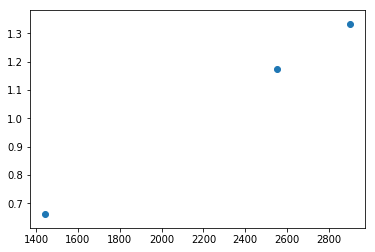

In [92]:
cal_e = [0.662,1.173,1.332]
cal_channel = [1444.28,2552.22,2899.51]

plt.scatter(cal_channel,cal_e)
plt.show()

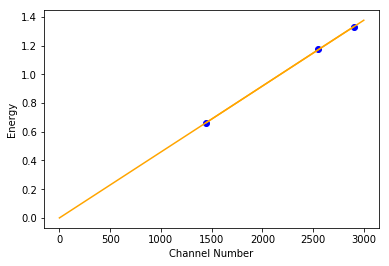

In [139]:
x = np.arange(0,3000,1)
m = 0.000459116
c = -0.00030

for i in range(len(x)):
    y = m*x+c
    
yerr = [0.000130539,-0.00054698,0.00125]
    
plt.errorbar(cal_channel,cal_e, ecolor = "r", yerr = yerr, color = 'orange')
plt.scatter(cal_channel,cal_e, color = 'blue')
plt.plot(x,y,color = 'orange')
plt.xlabel("Channel Number")
plt.ylabel("Energy")
#plt.xlim(0)
#plt.ylim(0)
#plt.title()
plt.show()

In [94]:
cal_coeff = 0.000459115906040934

energy = np.empty(len(count)) #in MeV

for i in range(len(energy)):
    energy[i] = count[i]*cal_coeff
    
print(energy)

[0.00000000e+00 4.59115906e-04 9.18231812e-04 ... 1.87916140e+00
 1.87962052e+00 1.88007964e+00]


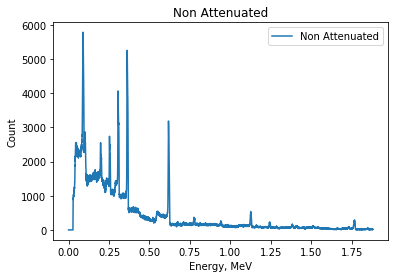

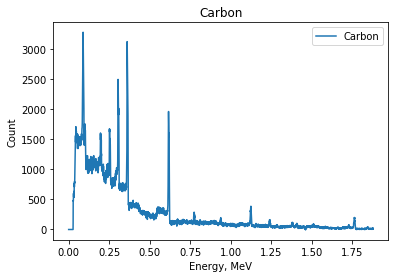

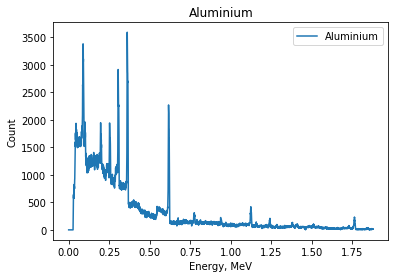

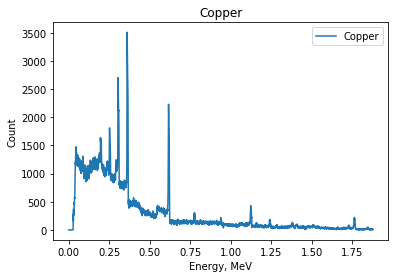

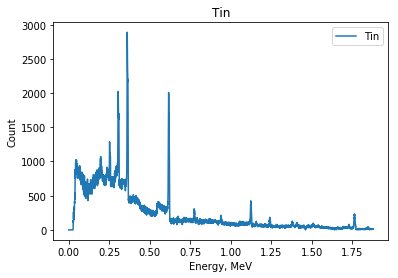

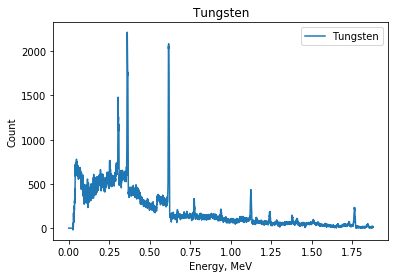

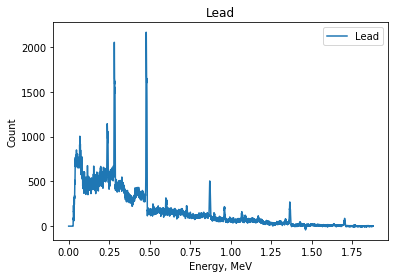

In [95]:
net_c = np.empty(len(carbon))
net_al = np.empty(len(al))
net_cu = np.empty(len(cu))
net_sn = np.empty(len(sn))
net_w = np.empty(len(tungsten))
net_pb = np.empty(len(pb))
net_nonat = np.empty(len(non_at))

for i in range(len(carbon)):
    net_nonat[i] = non_at[i]-background[i]
    net_c[i] = carbon[i]-background[i]
    net_al[i] = al[i]-background[i]
    net_cu[i] = cu[i]-background[i]
    net_sn[i] = sn[i]-background[i]
    net_w[i] = tungsten[i]-background[i]
    net_pb[i] = pb[i]-background[i]

graphs = [net_nonat,net_c,net_al, net_cu, net_sn, net_w, net_pb]
title = ["Non Attenuated","Carbon","Aluminium","Copper","Tin", "Tungsten","Lead"]

for i in range(7):
    plt.plot(energy,graphs[i], label = title[i])
    plt.title(title[i])
    plt.xlabel("Energy, MeV")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
#plt.xlabel("Energy, MeV")
#plt.ylabel("Count")
#plt.title("Count Rate vs Energy")
#plt.legend()
#plt.show()    
    
#plt.scatter(energy,net_carbon, label = "Net Carbon")
#plt.legend()
#plt.show()

#print(len(net_nonat))

In [96]:
energy_ref = [3.00E-01,4.00E-01,5.00E-01,6.00E-01,8.00E-01,1.00E+00,1.02E+00,1.25E+00,1.50E+00,2.00E+00,2.04E+00]
coherent_c = [2.13E+00,1.90E+00,1.74E+00,1.61E+00,1.41E+00,1.27E+00,1.26E+00,1.14E+00,1.03E+00,8.86E-01,8.76E-01]
incoherent_c = [2.12E+00,1.90E+00,1.74E+00,1.61E+00,1.41E+00,1.27E+00,1.26E+00,1.13E+00,1.03E+00,8.86E-01,8.76E-01]



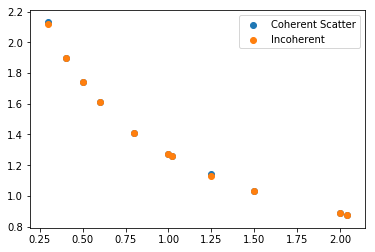

In [97]:
#ref_c = np.loadtxt("ref_C.csv",delimiter = ",", skiprows = 1)

#print(ref_c)

#plt.plot(energy,net_c, label = "Carbon Data")
plt.scatter(energy_ref,coherent_c,label = "Coherent Scatter")
plt.scatter(energy_ref,incoherent_c,label = "Incoherent")
plt.legend()
plt.show()

In [104]:
Na = 6.0221409e+23

element = ["C","Al","Cu","Sn","W","Pb"]
Z = [6,13,29,50,74,82]
A = [12.0107,26.981538,63.546,118.71,183.84,207.2]
x = [7.620,6.341,7.623,7.785,7.634,7.635] #cm
y = [8.635,6.346,8.638,8.730,8.652,8.640]
z = [2.547,1.296,0.537,0.730,0.275,0.394]
M = [294.0,311.3,315.7,362.4,307.7,291.6]

NpA = np.empty(len(z))

for i in range(6):
    NpA[i] = (Na*M[i])/(A[i]*x[i]*y[i]) #/ 1e-4
    
for i in range(6):
    print("#Nuclei/Area", element[i], "=", NpA[i])

#Nuclei/Area C = 2.240333176272161e+23
#Nuclei/Area Al = 1.7266547612540997e+23
#Nuclei/Area Cu = 4.543579762290887e+22
#Nuclei/Area Sn = 2.7050726653630804e+22
#Nuclei/Area W = 1.5260534006699155e+22
#Nuclei/Area Pb = 1.2847715090722212e+22


In [105]:
peaks, _ = find_peaks(net_c, threshold = 1, width = 10, prominence = 80)
peaks1, _ = find_peaks(net_al, threshold = 1, width = 10, prominence = 70)
peaks2, _ = find_peaks(net_cu,distance = 80, threshold = 5, width = 14, prominence = (100))
peaks3, _ = find_peaks(net_sn, threshold = 1, width = 10, prominence = 100)
peaks4, _ = find_peaks(net_w, prominence = 100, width = 12, threshold = 1)
peaks5, _ = find_peaks(net_pb, prominence = 100, width = 8, distance = 50)
peaks6, _ = find_peaks(net_nonat,distance = 70, threshold = 1, width = 10, prominence = 80)

#the _ is the width of the peaks


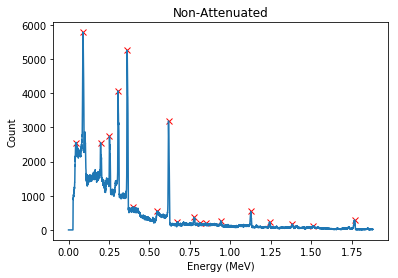

Energy (MeV) = [0.04820717 0.08906849 0.19787896 0.25297286 0.30623031 0.36224245
 0.39851261 0.54864351 0.61751089 0.6726048  0.77498765 0.81263515
 0.84706885 0.94026938 1.1257522  1.24374499 1.38239799 1.51278691
 1.76667801]
Count = [2556. 5782. 2551. 2739. 4065. 5253.  672.  547. 3184.  230.  369.  213.
  205.  268.  539.  230.  170.  119.  293.]


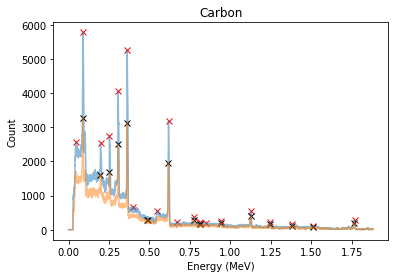

Energy (MeV) = [0.08906849 0.19650161 0.25205463 0.30531208 0.36132422 0.48666286
 0.49125402 0.61705178 0.77498765 0.81079869 0.81263515 0.93935114
 1.1257522  1.24190853 1.38056153 1.51186868 1.76575977]
Count = [3282. 1606. 1676. 2497. 3126.  296.  296. 1963.  288.  158.  158.  197.
  387.  164.  118.   92.  199.]


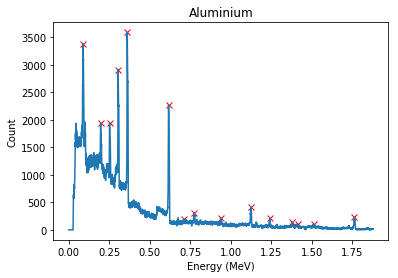

Energy (MeV) = [0.08906849 0.19741984 0.25297286 0.30577119 0.36178333 0.61705178
 0.70933407 0.77590588 0.93889203 1.12529309 1.24328587 1.38239799
 1.41361787 1.51278691 1.76484154]
Count = [3379. 1946. 1942. 2913. 3590. 2269.  193.  312.  224.  420.  209.  135.
  103.  106.  229.]


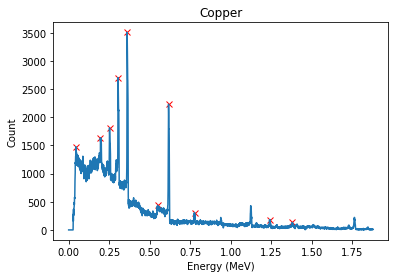

Energy (MeV) = [0.04453424 0.19650161 0.25251375 0.30531208 0.36132422 0.54956174
 0.61705178 0.77728323 1.24236764 1.38147976]
Count = [1476. 1636. 1811. 2703. 3509.  437. 2230.  309.  184.  132.]


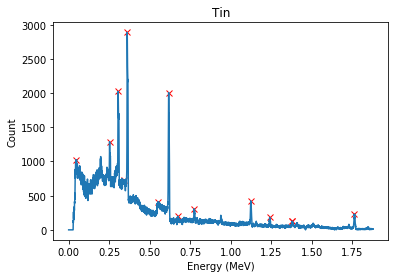

Energy (MeV) = [0.04820717 0.25297286 0.30577119 0.33882754 0.36178333 0.55231643
 0.61751089 0.6753595  0.77498765 1.12483397 1.24190853 1.38056153
 1.38193888 1.76484154]
Count = [1026. 1288. 2025.  733. 2891.  412. 2009.  199.  308.  424.  183.  125.
  125.  229.]


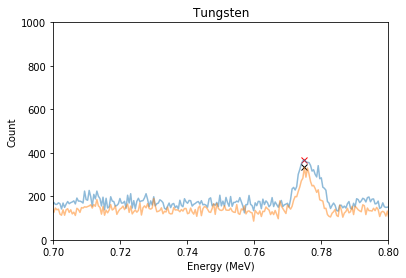

Energy (MeV) = [0.04820717 0.24333143 0.30577119 0.36178333 0.55231643 0.55369378
 0.61751089 0.77498765 1.12529309 1.24374499 1.38102065 1.76484154
 1.76621889]
Count = [ 779.  632. 1480. 2214.  380.  380. 2084.  333.  436.  189.  147.  233.
  233.]


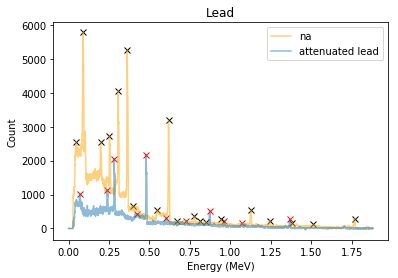

Energy (MeV) = [0.06886739 0.23828116 0.28189717 0.42376398 0.47885789 0.60052361
 0.72815783 0.87140199 0.96230694 1.06928095 1.36586982]
Count = [1003. 1143. 2051.  432. 2163.  315.  227.  504.  218.  162.  270.]


In [133]:
plt.plot(energy[peaks6], net_nonat[peaks6], 'x', color = "r")
plt.plot(energy,net_nonat)
plt.title("Non-Attenuated")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =", energy[peaks6])
print("Count =", net_nonat[peaks6])

plt.plot(energy[peaks6], net_nonat[peaks6], 'x', color = "r")
plt.plot(energy,net_nonat, label = "na", alpha = 0.5)
plt.plot(energy[peaks], net_c[peaks], 'x', color = "k")
plt.plot(energy,net_c, alpha = 0.5, label='attenuated carbon')
plt.title("Carbon")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =",energy[peaks])
print("Count =", net_c[peaks])

plt.plot(energy[peaks1], net_al[peaks1], 'x', color = "r")
plt.plot(energy,net_al)
plt.title("Aluminium")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =",energy[peaks1])
print("Count =", net_al[peaks1])

plt.plot(energy[peaks2], net_cu[peaks2], 'x', color = "r")
plt.plot(energy,net_cu)
plt.title("Copper")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =",energy[peaks2])
print("Count =", net_cu[peaks2])

plt.plot(energy[peaks3], net_sn[peaks3], 'x', color = "r")
plt.plot(energy,net_sn)
plt.title("Tin")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =",energy[peaks3])
print("Count =", net_sn[peaks3])

plt.plot(energy[peaks6], net_nonat[peaks6], 'x', color = "r")
plt.plot(energy,net_nonat, label = "na", alpha = 0.5)
plt.plot(energy[peaks4], net_w[peaks4], 'x', color = "k")
plt.plot(energy,net_w, alpha = 0.5, label='attenuated tungsten')
plt.title("Tungsten")
plt.xlim(0.7,0.8)
plt.ylim(0,1000)
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy (MeV) =",energy[peaks4])
print("Count =", net_w[peaks4])

plt.plot(energy[peaks5], net_pb[peaks5], 'x', color = "r")
plt.plot(energy[peaks6], net_nonat[peaks6], 'x', color = "k")
plt.plot(energy,net_nonat, color = "orange", label = "na", alpha = 0.5)
plt.plot(energy,net_pb, alpha = 0.5, label='attenuated lead')
plt.title("Lead")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.legend()
plt.show()
print("Energy (MeV) =",energy[peaks5])
print("Count =", net_pb[peaks5])

# The one below here is the peaks

c_peaks is the energy ranges for carbon
c_peakscount is the count at the respective peaks
pb is lead
and can ignore the rest

In [107]:
w_peaks = [0.30577119,0.36178333,0.55231643,0.61751089,0.77498765,1.12529309,1.24374499,1.38102065,1.76621889]
naw_peaks = [0.30623031,0.36224245,0.54864351,0.61751089,0.77498765,1.1257522,1.24374499,1.38239799,1.76667801]
w_ind =[2,3,4,6,7,8,9,10,12]
naw_ind = [4,5,7,8,10,14,15,16,18]
w_peakscount = [1480,2214,380,2084,333,436,189,147,233]
naw_peakscount =[4065,5253,547,3184,369,539,230,170,293]


c_peaks = [0.30531208,0.36132422,0.61705178,0.93935114,1.1257522,1.24190853,1.38056153,1.76575977]
c_ind = [4,5,6,7,8,9,10,11,12]

nac_peaks = [0.30623031,0.36224245,0.61751089,0.94072849,1.12529309,1.24374499,1.38239799,1.76621889]
nac_ind = [4,5,8,10,12,13,14,15,16]

#pb_peaks = [0.28189717,0.47885789,0.60144184,0.72953517,0.87140199,0.96230694,1.06928095,1.36586982]
pb_ind = [3,4,5,6,7,8,9,10]

#napb_peaks = [0.30623031,0.54864351,0.61751089,0.77544677,0.81263515,0.94072849,1.12529309,1.38239799]
napb_ind = [4,7,8,10,11,12,13,15]

pb_peaks = [0.28189717,0.60144184,0.72953517,0.87140199,0.96230694,1.06928095,1.36586982]
napb_peaks = [0.30623031,0.61751089,0.77544677,0.81263515,0.94072849,1.12529309,1.38239799]

c_peakscount = [2620,3243,2029,203,393,167,121,202]
pb_peakscount = [2141,1334,244,122,230,165,70]
nac_peakscount = [4170,5364,3247,288,553,236,170,295]
napb_peakscount = [4170,3247,386,219,288,553,170]



print(c_peakscount)
print(nac_peakscount)
print(w_peakscount)
print(naw_peakscount)

print(c_peaks)
print(nac_peaks)
print(w_peaks)
print(naw_peaks)

[2620, 3243, 2029, 203, 393, 167, 121, 202]
[4170, 5364, 3247, 288, 553, 236, 170, 295]
[1480, 2214, 380, 2084, 333, 436, 189, 147, 233]
[4065, 5253, 547, 3184, 369, 539, 230, 170, 293]
[0.30531208, 0.36132422, 0.61705178, 0.93935114, 1.1257522, 1.24190853, 1.38056153, 1.76575977]
[0.30623031, 0.36224245, 0.61751089, 0.94072849, 1.12529309, 1.24374499, 1.38239799, 1.76621889]
[0.30577119, 0.36178333, 0.55231643, 0.61751089, 0.77498765, 1.12529309, 1.24374499, 1.38102065, 1.76621889]
[0.30623031, 0.36224245, 0.54864351, 0.61751089, 0.77498765, 1.1257522, 1.24374499, 1.38239799, 1.76667801]


0.37758175081465256


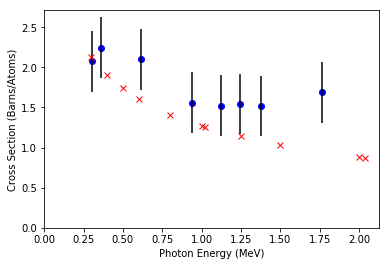

In [164]:
def sig(npa,n1,n2):
    return np.log(n2/n1)/npa

sig_c = np.empty(len(c_peaks))

#Carbon
for i in range(len(c_peaks)):
    sig_c[i] = sig(NpA[0],c_peakscount[i],nac_peakscount[i])*(10**(24))

err = np.sqrt(np.sum(sig_c*1e-2))
print(err)
    
plt.scatter(c_peaks,sig_c,label="Carbon", color = "b")
plt.errorbar(c_peaks,sig_c, ecolor = "k", yerr = err, linestyle = 'none' )
plt.plot(energy_ref,coherent_c, 'x',label = "Coherent Scatter",color = 'r')
#plt.plot(energy_ref,incoherent_c,'.',label = "Incoherent")
#plt.legend()
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross Section (Barns/Atoms)")
plt.xlim(0)
plt.ylim(0)

#plt.title("Photon Absorption for Carbon")
plt.show()

In [142]:
energy_ref2 = [3.00E-01,4.00E-01,5.00E-01,6.00E-01,8.00E-01,1.00E+00,1.02E+00,1.25E+00,1.50E+00,2.00E+00,2.04E+00]
coherent_w = [9.89E+01,5.88E+01,4.21E+01,3.34E+01,2.46E+01,2.02E+01,1.98E+01,1.70E+01,1.53E+01,1.35E+01,1.34E+01]
incoherent_w = [9.12E+01,5.43E+01,3.92E+01,3.13E+01,2.35E+01,1.95E+01,1.91E+01,1.65E+01,1.49E+01,1.33E+01,1.33E+01]

15.247913038480814


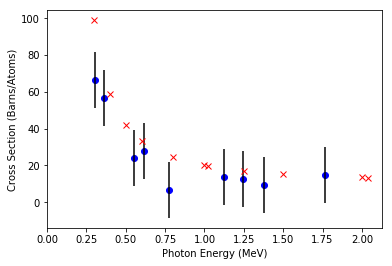

In [155]:
sig_w = np.empty(len(w_peaks))
npaw = 1.5260534006699155e+22
#tungsten
for i in range(len(w_peaks)):
    sig_w[i] = (sig(npaw,w_peakscount[i],naw_peakscount[i])*(10**(24)))
    
#for i in range(len(sig_w)):
#    if sig_w[i] < 0:
#        sig_w[i] = -sig_w[i]

err = np.sqrt(np.sum(sig_w))
print(err)
        
plt.scatter(w_peaks,sig_w,label="Tungsten", color = "b")
plt.errorbar(w_peaks,sig_w, ecolor = "k", yerr = err, linestyle = 'none' )
plt.plot(energy_ref2,coherent_w,'x',label = "Coherent Scatter",color = 'r')
#plt.plot(energy_ref2,incoherent_w,'--',label = "Incoherent")
#plt.legend()
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross Section (Barns/Atoms)")
plt.xlim(0)
#plt.ylim(0)
#plt.title("Photon Absorption for Tungsten")
plt.show()

err = np.sqrt(np.sum(np.square(sig_w)))

In [14]:
energy_ref2 = [3.00E-01,4.00E-01,5.00E-01,6.00E-01,8.00E-01,1.00E+00,1.02E+00,1.25E+00,1.50E+00,2.00E+00,2.04E+00]
coherent_pb = [1.39E+02,7.99E+01,5.55E+01,4.29E+01,3.05E+01,2.44E+01,2.40E+01,2.02E+01,1.80E+01,1.59E+01,1.58E+01]
incoherent_pb = [1.28E+02,7.39E+01,5.16E+01,4.02E+01,2.89E+01,2.34E+01,2.30E+01,1.96E+01,1.75E+01,1.56E+01,1.55E+01]

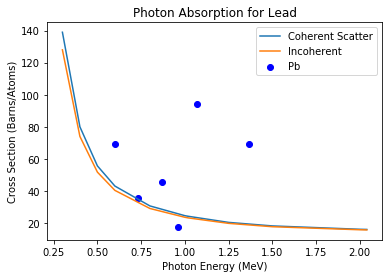

In [15]:
sig_pb = np.empty(len(pb_peaks))
npapb = 1.2847715090722212e+22
#lead
for i in range(len(pb_peaks)):
    sig_pb[i] = (sig(npapb,pb_peakscount[i],napb_peakscount[i])*(10**(24)))
    
for i in range(len(sig_pb)):
    if sig_pb[i] < 0:
        sig_pb[i] = -sig_pb[i]
        
plt.scatter(pb_peaks[1:8],sig_pb[1:8],label="Pb", color = "b")
plt.plot(energy_ref2,coherent_pb,label = "Coherent Scatter")
plt.plot(energy_ref2,incoherent_pb,label = "Incoherent")
plt.legend()
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross Section (Barns/Atoms)")
plt.title("Photon Absorption for Lead")
plt.show()



C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


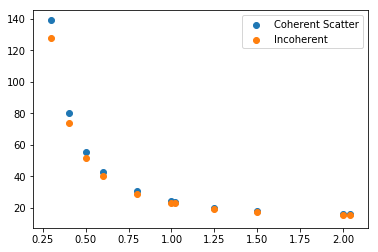

In [16]:
sig_pb = np.empty(len(net_pb))

#lead
for i in range(len(net_pb)):
    sig_pb[i] = sig(NpA[5],net_pb[i],energy[i])*(10**(24))
    
    
#plt.plot(energy,sig_pb,label="Lead")
plt.scatter(energy_ref2,coherent_pb,label = "Coherent Scatter")
plt.scatter(energy_ref2,incoherent_pb,label = "Incoherent")
plt.legend()
plt.show()



## Under here is bs

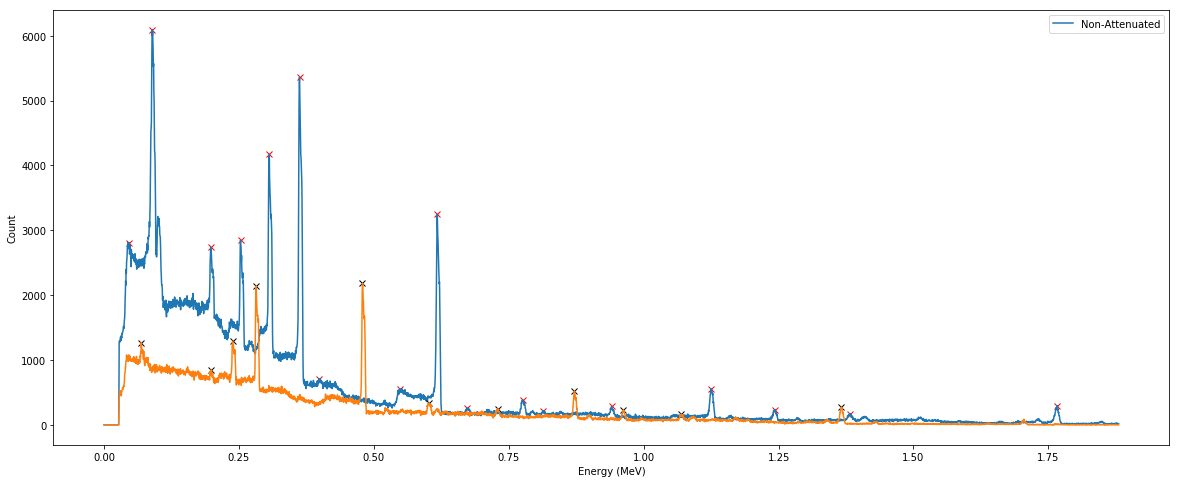

Energy pb (MeV) = [0.06886739 0.19787896 0.23828116 0.28189717 0.47885789 0.60144184
 0.72953517 0.87140199 0.96230694 1.06928095 1.36586982]
Energy Non attenuated (MeV) = [0.04637071 0.08906849 0.19833807 0.25297286 0.30623031 0.36224245
 0.39851261 0.54864351 0.61751089 0.6726048  0.77544677 0.81263515
 0.94072849 1.12529309 1.24374499 1.38239799 1.76621889]
Count Carbon = [1774. 1747. 1106.  933.  296.  308.  157.  113.  101.   94.   61.]
Count na = [1826. 3594. 1790. 1775. 2310. 3064.  525.  368. 1939.  174.  272.  164.
  161.  359.  118.  113.  188.]


In [103]:
plt.plot(energy[peaks6], net_nonat[peaks6], 'x', color = "r")
plt.plot(energy,net_nonat, label = "Non-Attenuated")
#plt.title("Non-Attenuated")
#plt.xlabel("Energy (MeV)")
#plt.ylabel("Count")
#print("Energy (MeV) =", energy[peaks6])
#print("Count =", net_nonat[peaks6])

plt.plot(energy[peaks5], net_pb[peaks5], 'x', color = "k")
plt.plot(energy,net_pb)
plt.legend()
#plt.title("Carbon")
plt.xlabel("Energy (MeV)")
plt.ylabel("Count")
plt.show()
print("Energy pb (MeV) =",energy[peaks5])
print("Energy Non attenuated (MeV) =",energy[peaks6])
print("Count Carbon =", net_c[peaks5])
print("Count na =", net_c[peaks6])

In [153]:
[0.04453424 0.19741984 0.25205463 0.77498765 0.93935114]
[0.04637071,0.19833807, 0.25297286, 0.77544677, 0.94072849]

indexdelnapb = [0,1,]
indexdelpb = [0,]
pb_na_energy = np.delete(energy[peaks6],indexdelnapb)
peakcount_napb = np.delete(net_nonat[peaks6],indexdelnapb)
print(energy[peaks5])
print(pb_na_energy)


indexdelnac = [6,7,9,11]
c_na_energy = np.delete(energy[peaks6],indexdelnac)
peakcount_nac = np.delete(net_nonat[peaks6],indexdelnac)

#print(energy[peaks])
#print(new_na)

print(len(net_c[peaks]),len(peakcount_nac))

[0.06886739 0.19787896 0.23828116 0.28189717 0.47885789 0.60144184
 0.72953517 0.87140199 0.96230694 1.06928095 1.36586982]
[0.19833807 0.25297286 0.30623031 0.36224245 0.39851261 0.54864351
 0.61751089 0.6726048  0.77544677 0.81263515 0.94072849 1.12529309
 1.24374499 1.38239799 1.76621889]
13 13


In [76]:
indexdel = []
indexdelna = []

for i in range(len(energy[peaks])):
    for j in range(len(energy[peaks6])):
        if energy[peaks6][j] >= energy[peaks][i]+0.1 or energy[peaks6][j] <= energy[peaks][i]-0.1:
            indexdel.append(i)
        break

print(indexdel)
#print(len(energy[peaks]))
#print(len(energy[peaks6]))

#new_c = np.delete(energy[peaks],indexdel)
new_na = np.delete(energy[peaks6],indexdel)

print(energy[peaks])
print(new_na)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.04453424 0.08906849 0.19741984 0.25205463 0.30531208 0.36132422
 0.61705178 0.77498765 0.93935114 1.1257522  1.24190853 1.38056153
 1.76575977]
[0.04637071 0.08906849 1.12529309 1.24374499 1.38239799 1.76621889]
